<h1><center><b>Bank Marketing</b></center></h1>

**Resumen**

Una institucion bancaria de portugal ha realizado campañas de marketing entre los años 2008 y 2013 donde tuvo algunos registros que demuestran la falta de 
interes por parte del publico.
El objetivo fue ofrecer suscripciones a depositos bancarios a los receptores por via telefonica, esta actividad se conoce como "telemarketing".

Dado que, el 88% de las ofertas o promociones realizadas no tuvieron exito, surgio una necesidad de segmentar al publico a contactar para prevenir las siguientes desventajas del telemarketing:
* Puede influir negativamente en la reputacion de la compañia si no se aplica adecuadamente.
* Interrumpe actividades en la vida del receptor.
* Las llamadas masivas acumulan costos.
* Hay probabilidad de que un cliente corte los servicios/contratos que tiene con la institucion.


La solucion propuesta es desarrollar un software (programa) que discrimine a los posibles casos de exito del resto de personas.

Los requisitos para iniciar es disponer de la informacion recopilada durante las campañas.

El proceso se divide en 4 pasos:
* Analisis de datos (EDA)
* Procesamiento de datos (transformaciones necesarias para el siguiente paso)
* Desarrollo de modelos predictivos (Machine learning)
* Seleccion de modelo (segun la/s metrica/s seleccionadas)

La institucion ha publicado los registros de las campañas en el siguiente link:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El dataset (conjunto de datos) esta compuesto por 4 archivos csv.

* bank.csv -> es una fraccion del dataset bank-full.csv
* bank-full.csv -> contiene informacion del cliente y de campañas anteriores
* bank-additional.csv -> es una fraccion del dataset bank-additional-full.csv
* bank-additional-full.csv -> contiene informacion del cliente, de campañas anteriores y datos socio-economicos

En principio habia 1 solo dataset, el bank-full.csv pero el personal de la institucion ha intentado resolver la problematica agregando informacion adicional el dataset original.

Asi es como se formo el dataset bank-additional-full.csv

Omitiendo las fracciones de datasets (bank.csv y bank-additional.csv), hay en disposicion 2 datasets para realizar el desarrollo de solucion.

Cada uno de ellos tiene diferentes tamaños y distintas variables, sin embargo, tienen una variable en comun que es "y" la variable objetivo a predecir. Esto significa que es posible hacer un desarrollo para cada uno y seleccionar el modelo que tenga mejor resultado en las metricas.

Esa es la forma en que procedera esta propuesta

# **Librerias y funciones**

In [1]:
#Importacion de librerias para visualizacion y transformacion de datos
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

#Funciones que grafican distribuciones de variables segun su tipo

def distribucion_columna_categorica(datos,columna):
    plt.figure(figsize=(23,6))
    plt.title("Distribucion de "+columna)
    sns.countplot(datos[columna])
    plt.show()

    
def distribucion_columna_numerica(datos,columna,mostrar_boxplot=False):
    plt.figure(figsize=(23,6))
    plt.title("Distribucion de "+columna)
    plt.hist(datos[columna],log=True)
    plt.show()
    
    if mostrar_boxplot:
        plt.figure(figsize=(23,6))
        plt.title("Diagrama caja de "+columna)
        plt.boxplot(datos[columna])
        plt.show()

# **Desarrollo en Bank full**

**EDA (analisis de datos) en Bank full**

In [2]:
#Carga de datos

df_bank_full = pd.read_csv("bank-full.csv",delimiter=";")

print("Dataset: Bank full")
print("="*64)
print("Cantidad de datos faltantes: "+str(sum(df_bank_full.isnull().sum())))
print("Tamaño del dataset: "+str(df_bank_full.shape))
print("")

df_bank_full.head()

Dataset: Bank full
Cantidad de datos faltantes: 0
Tamaño del dataset: (45211, 17)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Tipos de datos y su descripcion**

age -> numerico continuo (edad del cliente)

job -> categorico nominal (trabajo del cliente)

marital -> categorico nominal (estado civil del cliente)

education -> categorico nominal (nivel academico del cliente)

default -> categorico binario (tiene credito en mora?, es un dato binario: no o yes)

balance -> numerico continuo (saldo medio anual)

housing -> categorico binario (tiene prestamo de vivienda?, es un dato binario: no o yes)

loan -> categorico binario (tiene prestamo personal?, es un dato binario: no o yes)

contact -> categorico nominal (tipo de comunicacion: celular, telefono)

day -> numerico discreto (dia de la ultima fecha de contacto)

month -> categorico ordinal (mes de la ultima fecha de contacto)

duration -> numerico continuo (duracion de la ultima llamada de contacto, en segundos)

campaign -> numerico continuo (cantidad de contactos realizados durante la campaña para cada cliente en particular)

pdays -> numerico continuo (cantidad de dias pasados desde que el cliente fue contactado por ultima vez)

previous -> numerico continuo (cantidad de contactos realizados antes de la campaña para cada cliente en particular)

poutcome -> categorico nominal (resultado de la campaña anterior para cada cliente en particular, puede ser un caso de exito, caso fallido, etc)

y -> categorico binario (el cliente se suscribio a un deposito?, es un dato binario: no o yes)

A continuacion seran expuestas las hipotesis que podrian aportar informacion relevante para la solucion

1) Los clientes con los que han tenido exito en la campaña anterior tienen mayor probabilidad de suscribirse a un deposito.

El siguiente grafico muestra la distribucion de "y" despues de filtrar los registros donde "poutcome" es igual a "success".

El 64.73% se suscribio a un deposito


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


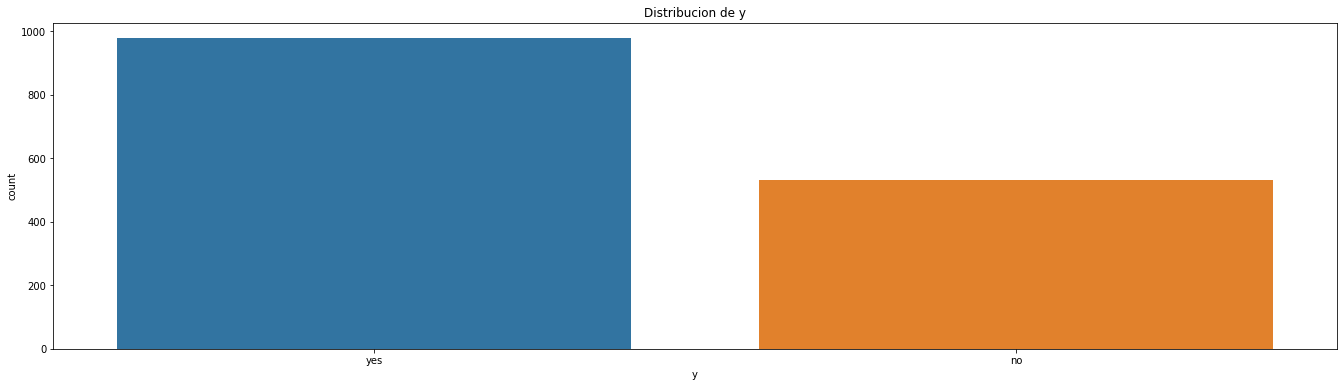

In [3]:
mask = df_bank_full["poutcome"] == "success"
df_bank_filtered = df_bank_full[mask].copy()
porcentaje = sum(df_bank_filtered["y"] == "yes")/df_bank_filtered.shape[0]
porcentaje *= 100
print("El "+str(round(porcentaje,2))+"% se suscribio a un deposito")
distribucion_columna_categorica(df_bank_filtered,"y")

Los casos positivos en "y" agrupan el 11% del dataset.

In [4]:
mask = (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje de casos positivos en 'y' es : "+str(round(porcentaje,2))+"%")

El porcentaje de casos positivos en 'y' es : 11.7%


De ese 11% hay un 2% que corresponde a los clientes con los que tuvieron exito en la campaña anterior

In [5]:
mask = (df_bank_full["poutcome"] == "success") & (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje es : "+str(round(porcentaje,2))+"%")

El porcentaje es : 2.16%


2) Las llamadas con duracion mayor a 500 segundos (8 min y 30 seg) tienen mayor probabiliad de concluir en una suscripcion.

El dataset fue dividido en 2 partes, una corresponde a los registros donde "y" es igual a "yes" y otro donde "y" es igual a "no"

In [6]:
mask = df_bank_full["y"] == "yes"
df_bank_y_yes = df_bank_full[mask].copy()

mask = df_bank_full["y"] == "no"
df_bank_y_no = df_bank_full[mask].copy()

Cluster yes


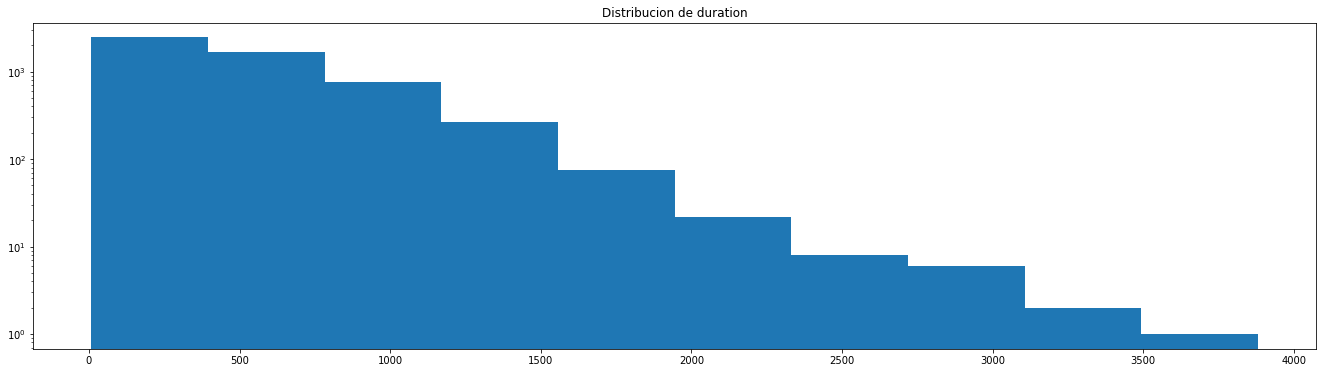

Cluster no


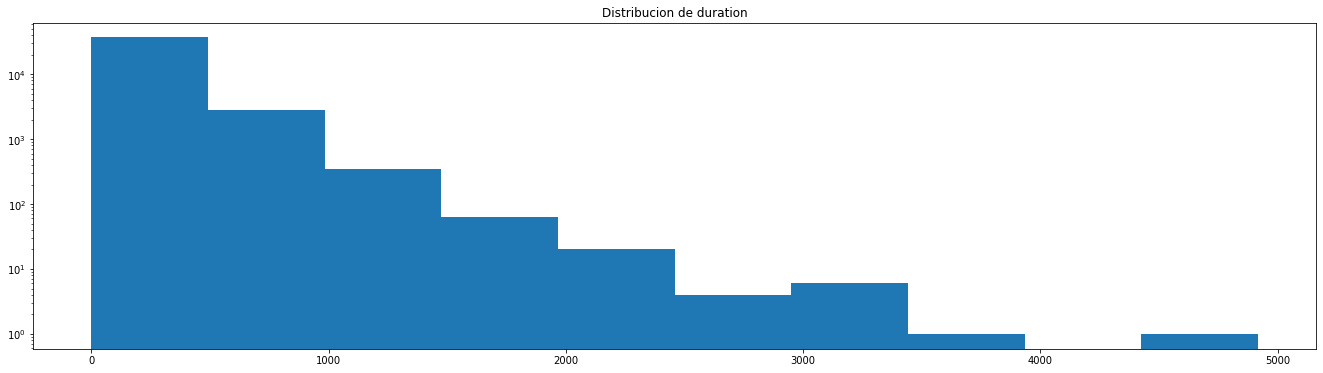

In [7]:
columna = "duration"
print("Cluster yes")
distribucion_columna_numerica(df_bank_y_yes,columna)
print("Cluster no")
distribucion_columna_numerica(df_bank_y_no,columna)

Los casos positivos en "y" agrupan el 11% del dataset.

In [8]:
mask = (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje de casos positivos en 'y' es : "+str(round(porcentaje,2))+"%")

El porcentaje de casos positivos en 'y' es : 11.7%


De ese 11% hay un 5% que corresponde a los clientes con los que tuvieron mas de 500 segundos de duracion en el contacto

In [9]:
mask = (df_bank_full["duration"] > 500) & (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje es : "+str(round(porcentaje,2))+"%")

El porcentaje es : 5.04%


3) Los clientes que NO tienen prestamo de vivienda tienen mas probabilidad de concluir una suscripcion a deposito.

La diferencia entre los graficos de abajo es la moda de cada distribucion, en el cluster "yes" la moda es "no", en el cluster "no" la moda es "yes"

Cluster yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


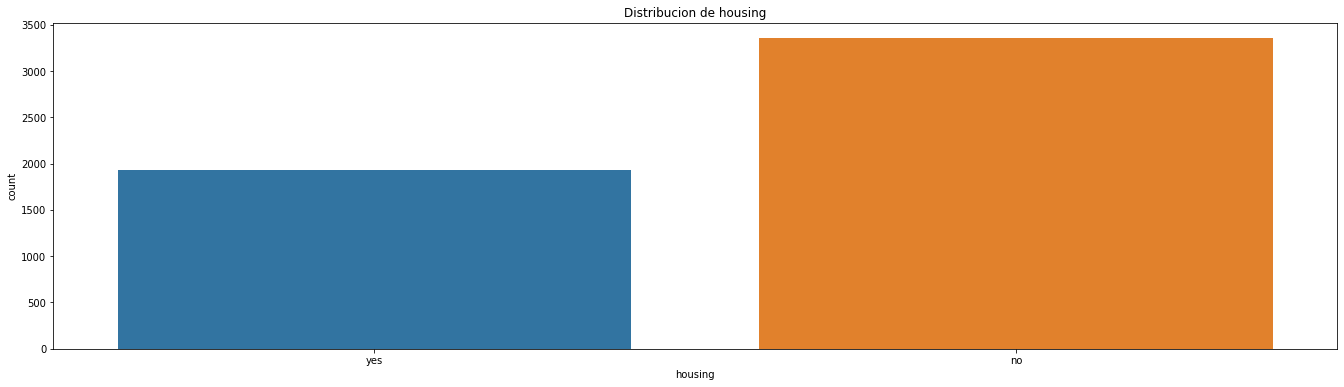

Cluster no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


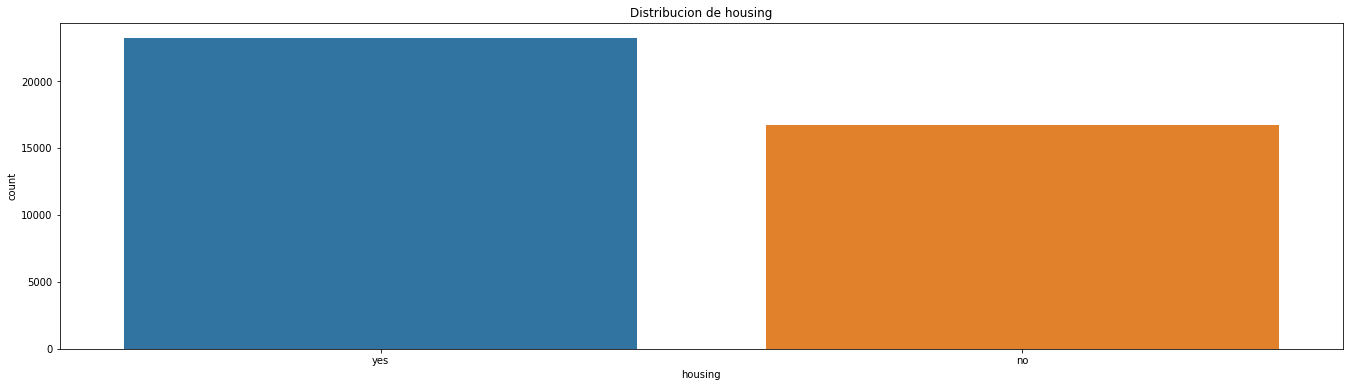

In [10]:
columna = "housing"
print("Cluster yes")
distribucion_columna_categorica(df_bank_y_yes,columna)
print("Cluster no")
distribucion_columna_categorica(df_bank_y_no,columna)

Los casos positivos en "y" agrupan el 11% del dataset.

In [11]:
mask = (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje de casos positivos en 'y' es : "+str(round(porcentaje,2))+"%")

El porcentaje de casos positivos en 'y' es : 11.7%


De ese 11% hay un 7.4% que corresponde a los clientes que NO tienen prestamos de vivienda

In [12]:
mask = (df_bank_full["housing"] == "no") & (df_bank_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_full.shape[0])*100
print("El porcentaje es : "+str(round(porcentaje,2))+"%")

El porcentaje es : 7.42%


**Procesamiento de datos en Bank full**

Es verdad que algunas variable contienen valores faltantes como "job","education","contact" y "poutcome".

Se identifican por la palabra "unknown".

Sin embargo, no considero correcto reemplazar o imputar los valores faltantes en el dataset debido a las limitaciones que tiene:
* Contiene informacion de 2008 a 2013, significa que es acotado y no representa a toda la base de datos de la institucion
* Podria derivar hipotesis erroneas por falsedad de contenido
* Las futuras campañas tendran probablemente los mismos valores discretos y la solucion tiene que ser robusta para todas las interpretaciones posibles

In [13]:
print("Valores discretos en job")
print(df_bank_full["job"].unique())
print("")
print("Valores discretos en education")
print(df_bank_full["education"].unique())
print("")
print("Valores discretos en contact")
print(df_bank_full["contact"].unique())
print("")
print("Valores discretos en poutcome")
print(df_bank_full["poutcome"].unique())

Valores discretos en job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Valores discretos en education
['tertiary' 'secondary' 'unknown' 'primary']

Valores discretos en contact
['unknown' 'cellular' 'telephone']

Valores discretos en poutcome
['unknown' 'failure' 'other' 'success']


In [14]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df_bank_full_v2 = df_bank_full.copy()

df_bank_full_v2 = pd.get_dummies(df_bank_full_v2,prefix=['job'], columns = ['job'], drop_first=True)
df_bank_full_v2 = pd.get_dummies(df_bank_full_v2,prefix=['marital'], columns = ['marital'], drop_first=True)
df_bank_full_v2 = pd.get_dummies(df_bank_full_v2,prefix=['education'], columns = ['education'], drop_first=True)
df_bank_full_v2 = pd.get_dummies(df_bank_full_v2,prefix=['contact'], columns = ['contact'], drop_first=True)
df_bank_full_v2 = pd.get_dummies(df_bank_full_v2,prefix=['poutcome'], columns = ['poutcome'], drop_first=True)

month_mapping = {
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12
}
binary_mapping = {
    "yes":1,"no":0
}

df_bank_full_v2["month"] = df_bank_full_v2["month"].map(month_mapping)
df_bank_full_v2["default"] = df_bank_full_v2["default"].map(binary_mapping)
df_bank_full_v2["housing"] = df_bank_full_v2["housing"].map(binary_mapping)
df_bank_full_v2["loan"] = df_bank_full_v2["loan"].map(binary_mapping)
df_bank_full_v2["y"] = df_bank_full_v2["y"].map(binary_mapping)

df_bank_full_v2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


**Desarrollo de modelos con dataset Bank full**

Este es un problema de clasificacion binaria, por lo tanto, los posibles modelos de machine learning para este caso son:
* Decision tree classifier
* Binary logistic regression
* Random forest classifier
* Support vector machine
* XGBoost classifier

Cada uno tendra sus hiperparametros optimizados y definidos por defecto para reducir el tiempo de ejecucion del notebook

La metrica a utilizar debe depender de:
* La precision porque los falsos negativos representan una perdido de venta para la institucion
* La exhaustividad porque los falsos positivos representan un costo de contacto y perdida de tiempo de personal

Por lo tanto, la metrica sera F1-score.

Sin embargo, las evaluaciones visualizaran otras metricas como matriz de confusion, accuracy score y AUC score para que el lector tenga una comprension mas integral sobre el rendimiento de los modelos

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [17]:
def matriz_confusion_predicciones(model,x,y):
  predicciones = model.predict(x)
  cm = confusion_matrix(y,predicciones, normalize='true')
  x_axis_labels = [0,1]
  y_axis_labels = [0,1]
  plt.figure(figsize=(23,8))
  sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.show()


def evaluacion_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy en testing: {acc}")
    print(f"F1 score en testing: {fscore}")
    print(f"AUC score en testing: {auc}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(23,8))
    plt.title("Curva ROC")
    plt.plot(fpr, tpr,label='ROC AUC: '+str(round(auc,4)))
    plt.legend()
    plt.show()
    matriz_confusion_predicciones(model,X_test,y_test)

El dataset sera dividido en training y testing para las evaluaciones, considerando que la distribucion de "y" esta desbalanceada es importante que el metodo de separacion sea estratificado.

De esa forma ambas fracciones tendran la misma forma de distribucion en "y"

In [18]:
features = df_bank_full_v2.drop(columns=["y"]).columns
target = 'y'

X = df_bank_full_v2[features].copy()
y = df_bank_full_v2[target].copy()

test_pct = 0.3 #30% de los dados para testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, stratify = y, random_state=42)

del X,y

**Decision tree classifier**

Accuracy en testing: 0.8938366263639045
F1 score en testing: 0.48644793152639093
AUC score en testing: 0.6925363510475523


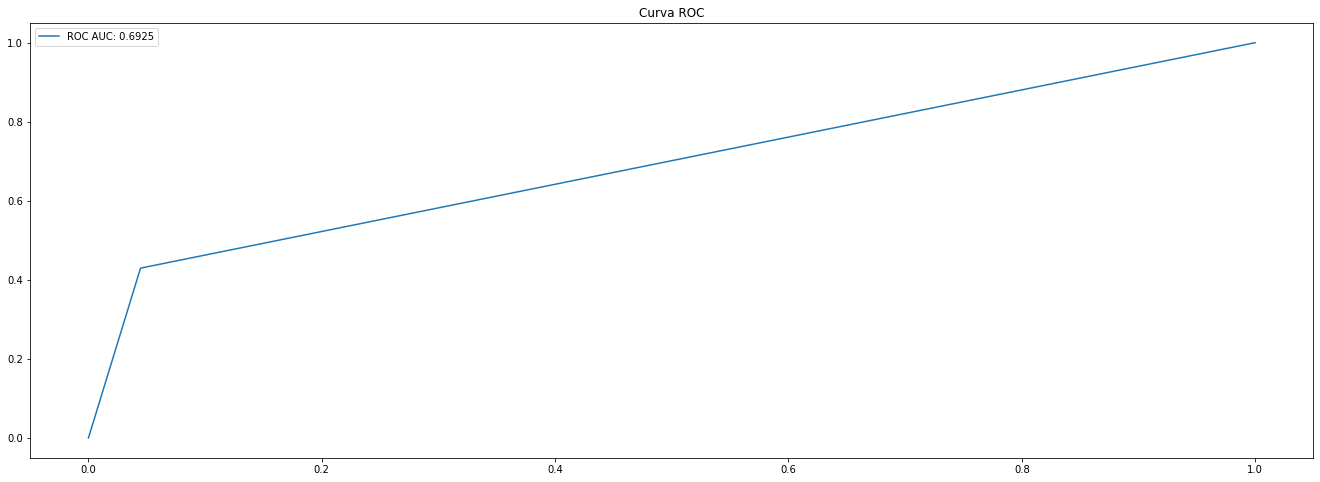

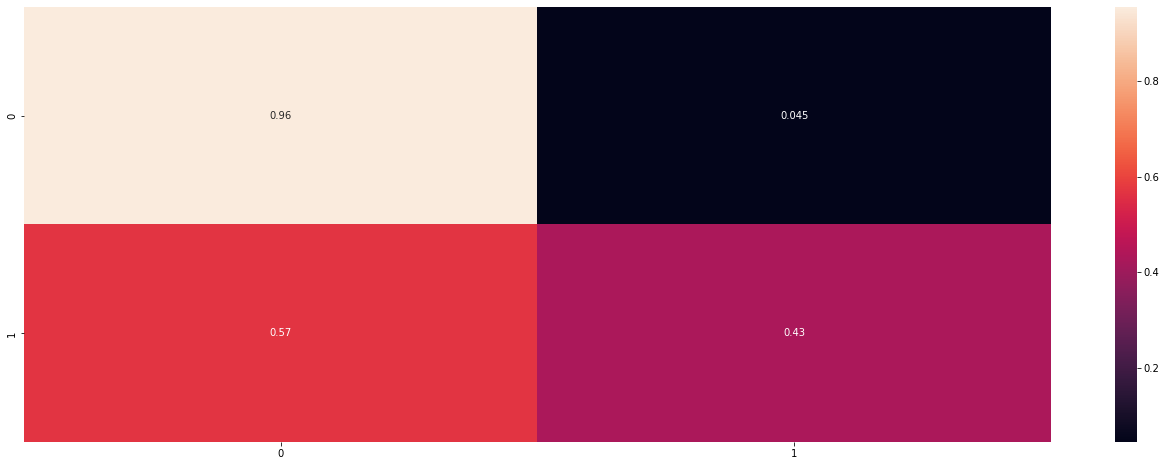

In [19]:
params = {
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(1,5),
    'criterion': ["gini", "entropy"],
    'max_depth':range(1,15)
}

params = {
    'min_samples_leaf': [3],
    'min_samples_split': [2],
    'criterion': ["entropy"],
    'max_depth':[13]
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Binary logistic regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy en testing: 0.8875700383367738
F1 score en testing: 0.2713807931199235
AUC score en testing: 0.5802092374172952


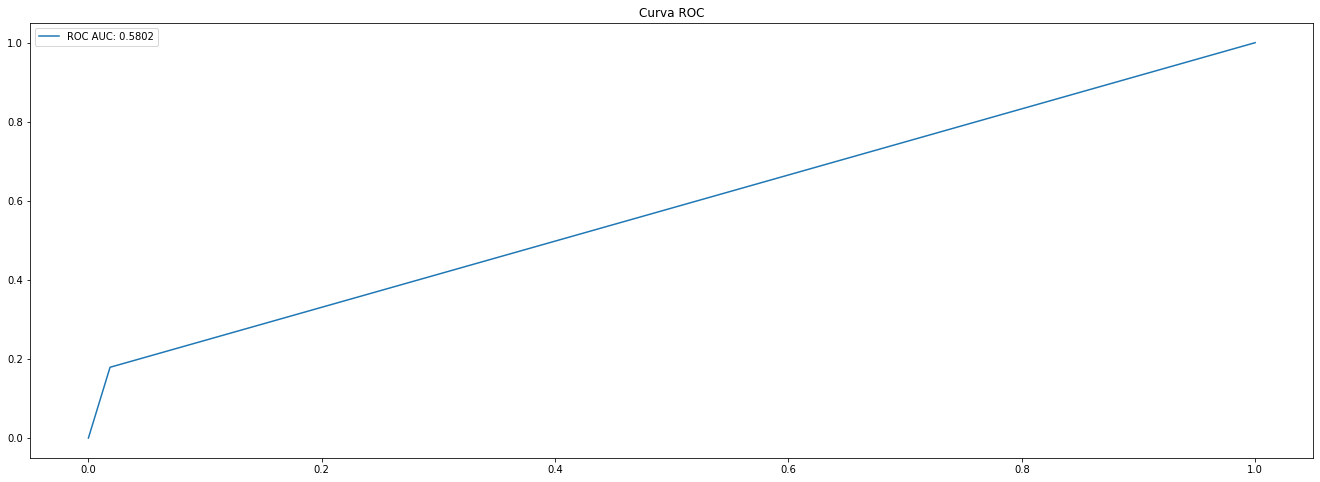

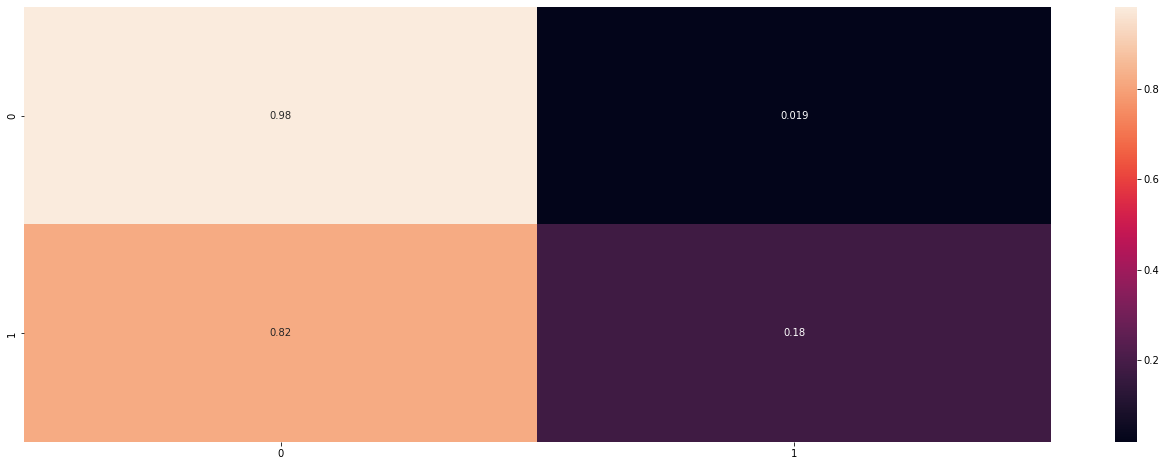

In [20]:
from sklearn.linear_model import LogisticRegression

grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l2"] #l2 ridge
}

grid={
    "C":[1000.0], 
    "penalty":["l2"] #l2 ridge
}

logreg=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(estimator=logreg, param_grid=grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
logreg_cv.fit(x_train,y_train)
evaluacion_modelo(logreg_cv.best_estimator_, x_test, y_test)

**Random forest classifier**

Accuracy en testing: 0.8925095841934533
F1 score en testing: 0.3627622377622378
AUC score en testing: 0.6188102916643583


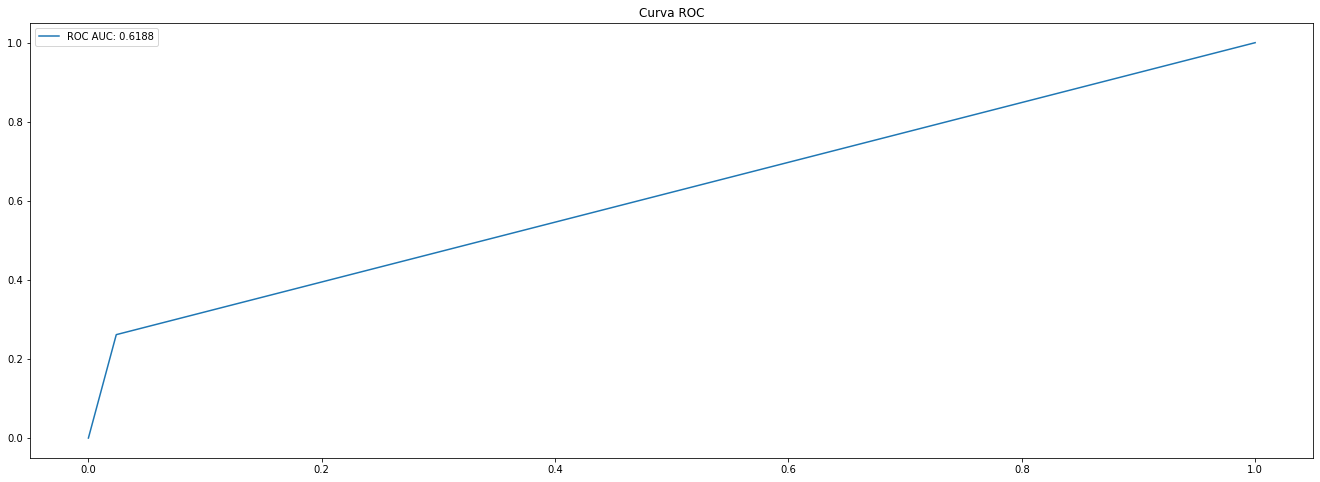

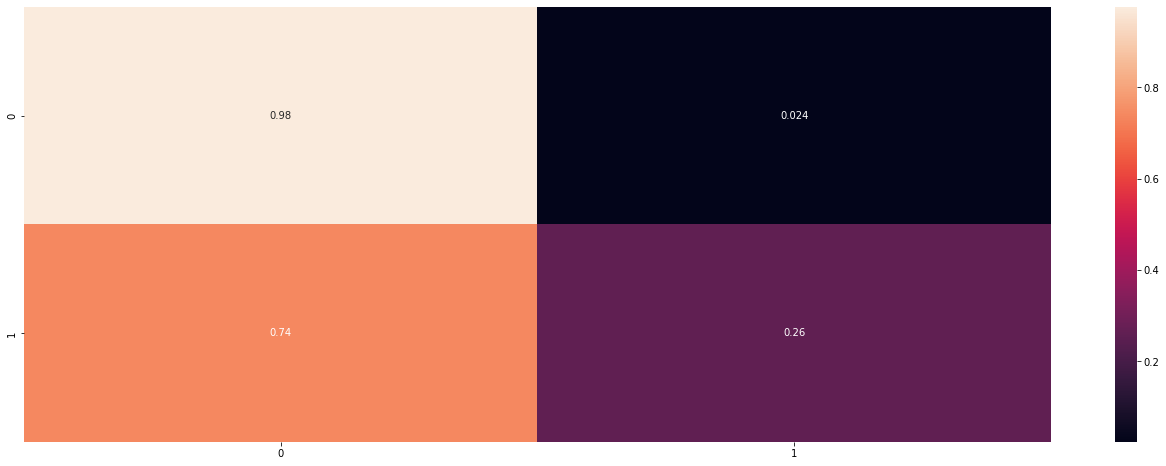

In [21]:
from sklearn.ensemble import RandomForestClassifier

params = {
 'bootstrap': [True, False],
 'max_depth': range(1,5),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'n_estimators': range(1,15)
}

params = {
 'bootstrap': [True],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [1]
}

tree = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Support vector machine**

Para este modelo en especial, es preferible utilizar el dataset bank.csv como fuente de informacion para entrenamiento.

La maquina de soporte vectorial (SVM) almacena una matriz que representa al dataset y calcula la distancia entre cada punto, es preferible que la matriz sea lo mas pequeña posible para que el tiempo de ejecucion sea minimo

In [22]:
df_bank_training_svm = pd.read_csv("bank.csv",delimiter=";")

df_bank_training_svm = pd.get_dummies(df_bank_training_svm,prefix=['job'], columns = ['job'], drop_first=True)
df_bank_training_svm = pd.get_dummies(df_bank_training_svm,prefix=['marital'], columns = ['marital'], drop_first=True)
df_bank_training_svm = pd.get_dummies(df_bank_training_svm,prefix=['education'], columns = ['education'], drop_first=True)
df_bank_training_svm = pd.get_dummies(df_bank_training_svm,prefix=['contact'], columns = ['contact'], drop_first=True)
df_bank_training_svm = pd.get_dummies(df_bank_training_svm,prefix=['poutcome'], columns = ['poutcome'], drop_first=True)

month_mapping = {
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12
}
binary_mapping = {
    "yes":1,"no":0
}

df_bank_training_svm["month"] = df_bank_training_svm["month"].map(month_mapping)
df_bank_training_svm["default"] = df_bank_training_svm["default"].map(binary_mapping)
df_bank_training_svm["housing"] = df_bank_training_svm["housing"].map(binary_mapping)
df_bank_training_svm["loan"] = df_bank_training_svm["loan"].map(binary_mapping)
df_bank_training_svm["y"] = df_bank_training_svm["y"].map(binary_mapping)

x_train_svm = df_bank_training_svm[features].copy()
y_train_svm = df_bank_training_svm[target].copy()

Accuracy en testing: 0.8829991153052197
F1 score en testing: 0.0
AUC score en testing: 0.5


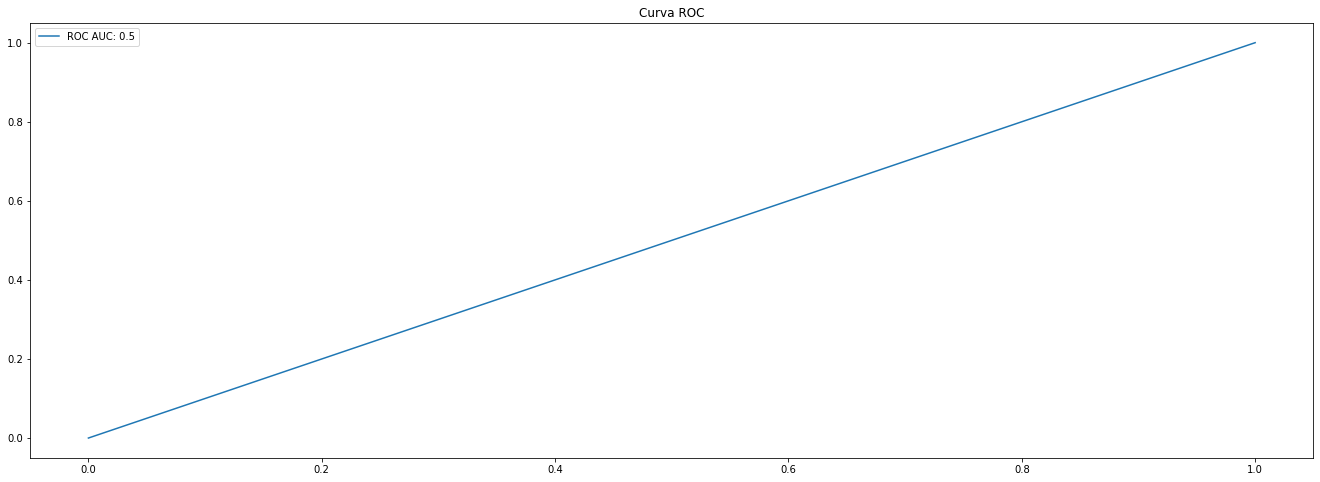

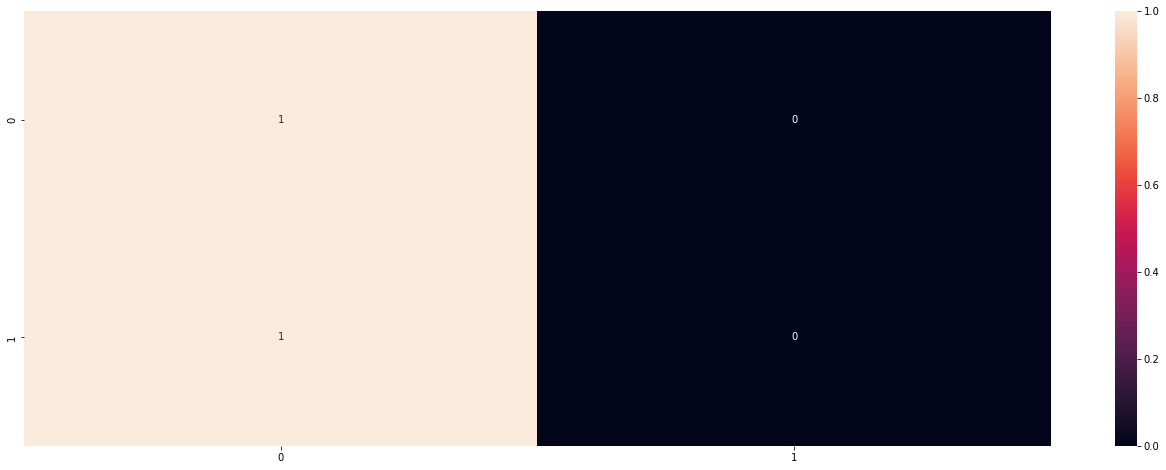

In [23]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1]
}

param_grid = {
    'C': [0.1],
    'gamma': [1]
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train_svm,y_train_svm)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**XGBoost classfier**

In [24]:
import xgboost
from xgboost import XGBClassifier

Accuracy en testing: 0.8995871424358596
F1 score en testing: 0.48873873873873874
AUC score en testing: 0.6873198835891033


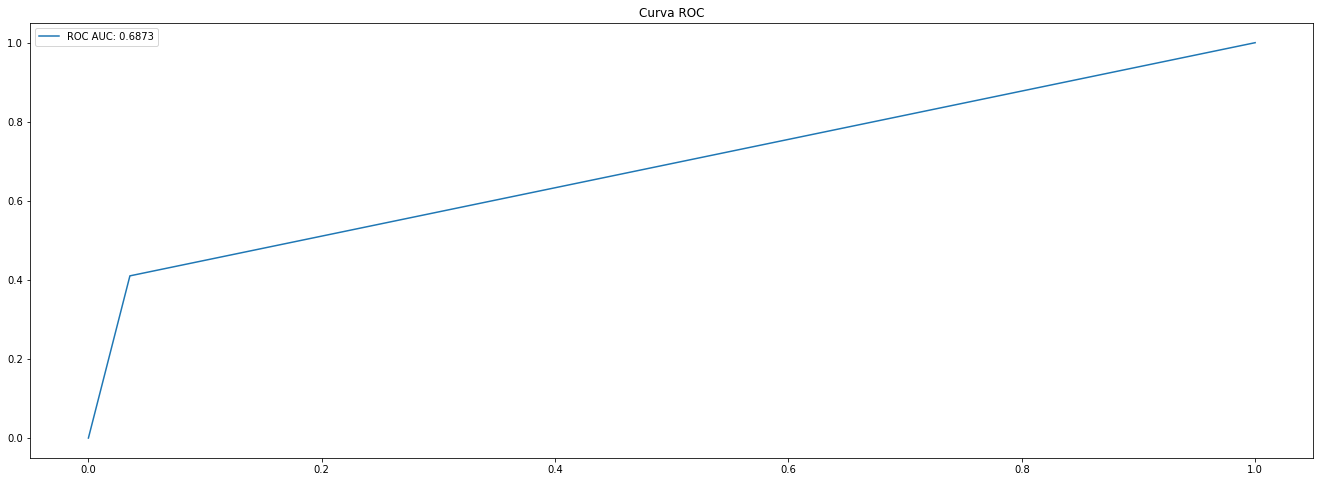

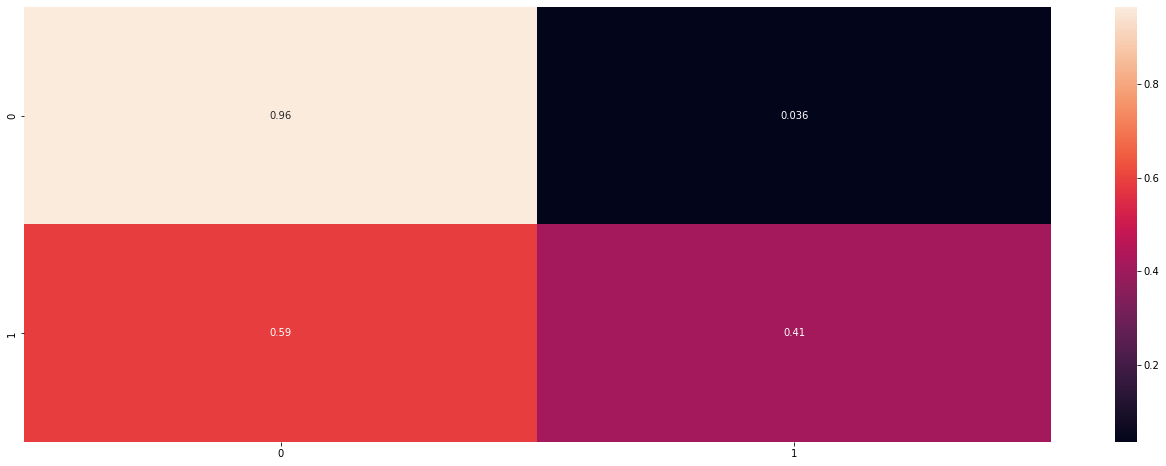

In [25]:
param_grid = {
 'gamma': [0.1, 1, 1.5],
 'learning_rate': [0.001, 0.01],
 'max_depth': [5, 10],
 'n_estimators': [1,5,10]
}

param_grid = {'gamma': [1.5], 'learning_rate': [0.01], 'max_depth': [10], 'n_estimators': [10]}

xgb_model = XGBClassifier(random_state=42, verbosity=0)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Seleccion del modelo para bank full**

El orden de resultados de F1-score es el siguiente:

XGBoost -> 0.488

Decision Tree -> 0.486

Random Forest -> 0.36

Logistic Regression -> 0.27

SVM -> 0

Antes de determinar el modelo con mayor rendimiento, es posible descartar algunos modelos:

* SVM: el dataset es demasiado grande para este modelo en particular, ademas no fue capaz de definir vectores que discriminen los clusters de "y"
* Random forest: el voto mayoritario es contraproducente en este caso porque casi el 90% del dataset corresponde a casos fallidos ("y" = "no"), probablemente la mayoria de arboles dentro del random forest no seran capaces de discriminar los clusters

Entre los modelos Decision tree, Logistic regression y XGBoost, mi eleccion es XGBoost porque tiene el mayor F1-score y ademas es posible seguir entrenandolo con mas hiperparametros

# **Desarrollo en Bank additional full**

**EDA (analisis de datos) en Bank additional full**

In [26]:
#Carga de datos

df_bank_additional_full = pd.read_csv("bank-additional-full.csv",delimiter=";")

print("Dataset: Bank additional full")
print("="*64)
print("Cantidad de datos faltantes: "+str(sum(df_bank_additional_full.isnull().sum())))
print("Tamaño del dataset: "+str(df_bank_additional_full.shape))
print("")

df_bank_additional_full.head()

Dataset: Bank additional full
Cantidad de datos faltantes: 0
Tamaño del dataset: (41188, 21)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Tipos de datos y su descripcion**

age -> numerico continuo (edad del cliente)

job -> categorico nominal (trabajo del cliente)

marital -> categorico nominal (estado civil del cliente)

education -> categorico nominal (nivel academico del cliente)

default -> categorico nominal (tiene credito en mora?)

housing -> categorico nominal (tiene prestamo de vivienda?)

loan -> categorico nominal (tiene prestamo personal?)

contact -> categorico binario (tipo de comunicacion: celular, telefono)

month -> categorico ordinal (mes de la ultima fecha de contacto)

day_of_week -> categorico ordinal (dia de la semana de la fecha en que se llevo a cabo el ultimo contacto)

duration -> numerico continuo (duracion de la ultima llamada de contacto, en segundos)

campaign -> numerico continuo (cantidad de contactos realizados durante la campaña para cada cliente en particular)

pdays -> numerico continuo (cantidad de dias pasados desde que el cliente fue contactado por ultima vez)


previous -> numerico continuo (cantidad de contactos realizados antes de la campaña para cada cliente en particular)

poutcome -> categorico nominal (resultado de la campaña anterior para cada cliente en particular, puede ser un caso de exito, caso fallido, etc)

emp.var.rate -> numerico continuo (tasa de variación del empleo - indicador trimestral)

cons.price.idx -> numerico continuo (índice de precios al consumidor - indicador mensual)

cons.conf.idx -> numerico continuo (índice de confianza del consumidor - indicador mensual) 

euribor3m -> numerico continuo (euribor 3 meses tasa - indicador diario)

nr.employed -> numerico continuo (número de empleados - indicador trimestral)

y -> categorico binario (el cliente se suscribio a un deposito?, es un dato binario: no o yes)

A continuacion seran expuestas las hipotesis que podrian aportar informacion relevante para la solucion

1) Los clientes con los que han tenido exito en la campaña anterior tienen mayor probabilidad de suscribirse a un deposito.

El siguiente grafico muestra la distribucion de "y" despues de filtrar los registros donde "poutcome" es igual a "success".

Los casos positivos en "y" agrupan el 11% del dataset.

In [27]:
mask = (df_bank_additional_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_additional_full.shape[0])*100
print("El porcentaje de casos positivos en 'y' es : "+str(round(porcentaje,2))+"%")

El porcentaje de casos positivos en 'y' es : 11.27%


De ese 11% hay un 2% que corresponde a los clientes con los que tuvieron exito en la campaña anterior

In [28]:
mask = (df_bank_additional_full["poutcome"] == "success") & (df_bank_additional_full["y"] == "yes")
porcentaje = (sum(mask)/df_bank_additional_full.shape[0])*100
print("El porcentaje es : "+str(round(porcentaje,2))+"%")

El porcentaje es : 2.17%


2) Los clientes que recibieron mas de 20 contactos durante la campaña no concluyeron la suscripcion al deposito.

Podria ser establecido como un limite para no acumular costo por contactos fallidos

El dataset fue dividido en 2 partes, una corresponde a los registros donde "y" es igual a "yes" y otro donde "y" es igual a "no"

In [29]:
mask = df_bank_additional_full["y"] == "yes"
df_bank_y_yes = df_bank_additional_full[mask].copy()

mask = df_bank_additional_full["y"] == "no"
df_bank_y_no = df_bank_additional_full[mask].copy()

Cluster yes


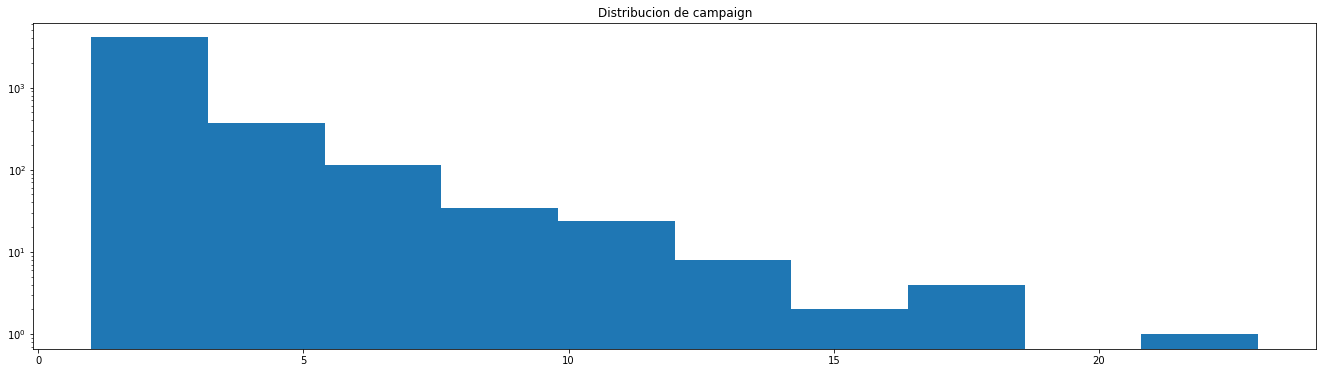

Cluster no


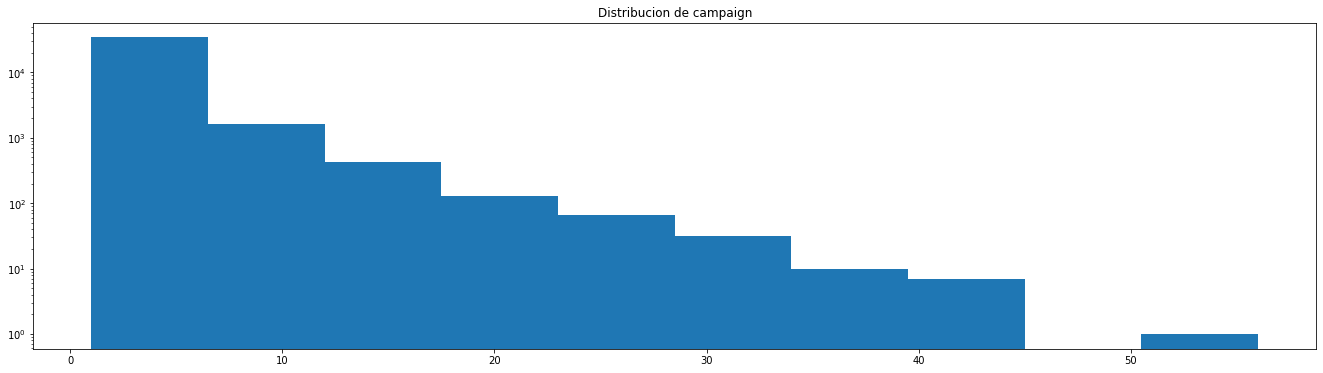

In [30]:
columna = "campaign"
print("Cluster yes")
distribucion_columna_numerica(df_bank_y_yes,columna)
print("Cluster no")
distribucion_columna_numerica(df_bank_y_no,columna)

**Procesamiento de datos en Bank additional full**

Es verdad que algunas variable contienen valores faltantes como "job","education","contact" y "poutcome".

Se identifican por la palabra "unknown".

Sin embargo, no considero correcto reemplazar o imputar los valores faltantes en el dataset debido a las limitaciones que tiene:
* Contiene informacion de 2008 a 2013, significa que es acotado y no representa a toda la base de datos de la institucion
* Podria derivar hipotesis erroneas por falsedad de contenido
* Las futuras campañas tendran probablemente los mismos valores discretos y la solucion tiene que ser robusta para todas las interpretaciones posibles

In [31]:
print("Valores discretos en job")
print(df_bank_full["job"].unique())
print("")
print("Valores discretos en education")
print(df_bank_full["education"].unique())
print("")
print("Valores discretos en contact")
print(df_bank_full["contact"].unique())
print("")
print("Valores discretos en poutcome")
print(df_bank_full["poutcome"].unique())

Valores discretos en job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Valores discretos en education
['tertiary' 'secondary' 'unknown' 'primary']

Valores discretos en contact
['unknown' 'cellular' 'telephone']

Valores discretos en poutcome
['unknown' 'failure' 'other' 'success']


In [32]:
df_bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df_bank_additional_full_v2 = df_bank_additional_full.copy()

df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['job'], columns = ['job'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['marital'], columns = ['marital'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['education'], columns = ['education'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['default'], columns = ['default'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['housing'], columns = ['housing'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['loan'], columns = ['loan'], drop_first=True)
df_bank_additional_full_v2 = pd.get_dummies(df_bank_additional_full_v2,prefix=['poutcome'], columns = ['poutcome'], drop_first=True)

month_mapping = {
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12
}
binary_mapping = {
    "yes":1,"no":0
}
contact_mapping = {
    "telephone":0,"cellular":0
}
dayweek_mapping = {
    'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,'sat':6,'sun':7
}

df_bank_additional_full_v2["month"] = df_bank_additional_full_v2["month"].map(month_mapping)
df_bank_additional_full_v2["day_of_week"] = df_bank_additional_full_v2["day_of_week"].map(dayweek_mapping)
df_bank_additional_full_v2["contact"] = df_bank_additional_full_v2["contact"].map(contact_mapping)
df_bank_additional_full_v2["y"] = df_bank_additional_full_v2["y"].map(binary_mapping)

df_bank_additional_full_v2.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,0,5,1,261,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
1,57,0,5,1,149,1,999,0,1.1,93.994,...,0,0,1,0,0,0,0,0,1,0
2,37,0,5,1,226,1,999,0,1.1,93.994,...,0,0,0,0,0,1,0,0,1,0
3,40,0,5,1,151,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
4,56,0,5,1,307,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,1,1,0


**Desarrollo de modelos con dataset Bank additional full**

Este es un problema de clasificacion binaria, por lo tanto, los posibles modelos de machine learning para este caso son:
* Decision tree classifier
* Binary logistic regression
* Random forest classifier
* Support vector machine
* XGBoost classifier

Cada uno tendra sus hiperparametros optimizados y definidos por defecto para reducir el tiempo de ejecucion del notebook

La metrica a utilizar debe depender de:
* La precision porque los falsos negativos representan una perdido de venta para la institucion
* La exhaustividad porque los falsos positivos representan un costo de contacto y perdida de tiempo de personal

Por lo tanto, la metrica sera F1-score.

Sin embargo, las evaluaciones visualizaran otras metricas como matriz de confusion, accuracy score y AUC score para que el lector tenga una comprension mas integral sobre el rendimiento de los modelos


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
def matriz_confusion_predicciones(model,x,y):
  predicciones = model.predict(x)
  cm = confusion_matrix(y,predicciones, normalize='true')
  x_axis_labels = [0,1]
  y_axis_labels = [0,1]
  plt.figure(figsize=(23,8))
  sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.show()


def evaluacion_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy en testing: {acc}")
    print(f"F1 score en testing: {fscore}")
    print(f"AUC score en testing: {auc}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(23,8))
    plt.title("Curva ROC")
    plt.plot(fpr, tpr,label='ROC AUC: '+str(round(auc,4)))
    plt.legend()
    plt.show()
    matriz_confusion_predicciones(model,X_test,y_test)

El dataset sera dividido en training y testing para las evaluaciones, considerando que la distribucion de "y" esta desbalanceada es importante que el metodo de separacion sea estratificado.

De esa forma ambas fracciones tendran la misma forma de distribucion en "y"

In [36]:
features = df_bank_additional_full_v2.drop(columns=["y"]).columns
target = 'y'

X = df_bank_additional_full_v2[features].copy()
y = df_bank_additional_full_v2[target].copy()

test_pct = 0.3 #30% de los dados para testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, stratify = y, random_state=42)

del X,y

**Decision tree classifier**

Accuracy en testing: 0.9098486687707372
F1 score en testing: 0.5922401171303076
AUC score en testing: 0.7663756741670206


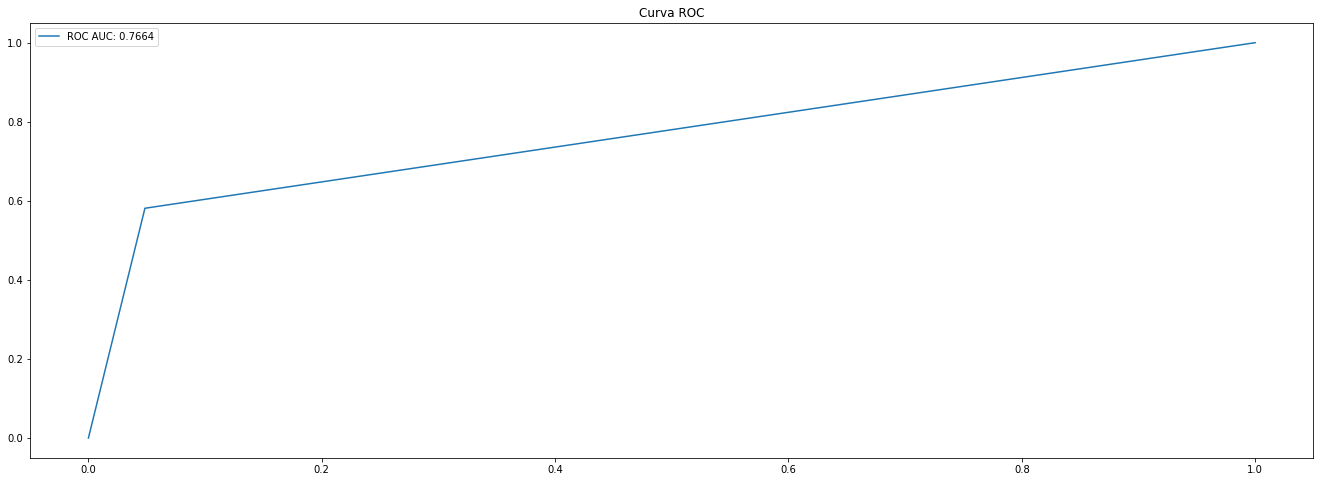

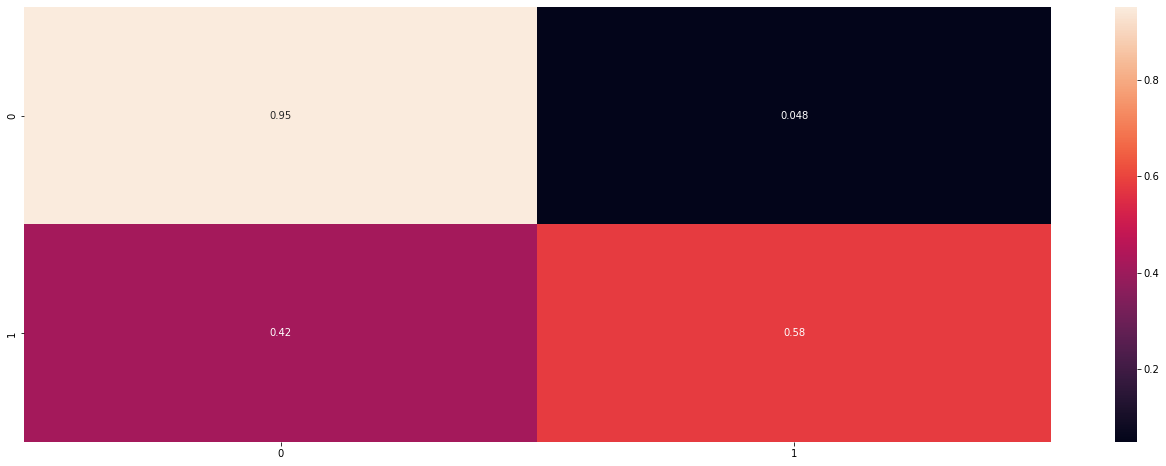

In [37]:
params = {
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,5),
    'criterion': ["gini", "entropy"],
    'max_depth':range(1,15)
}

params = {
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'criterion': ["gini"],
    'max_depth':[3]
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Binary logistic regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy en testing: 0.9087157076960427
F1 score en testing: 0.48114075436982523
AUC score en testing: 0.676048889884743


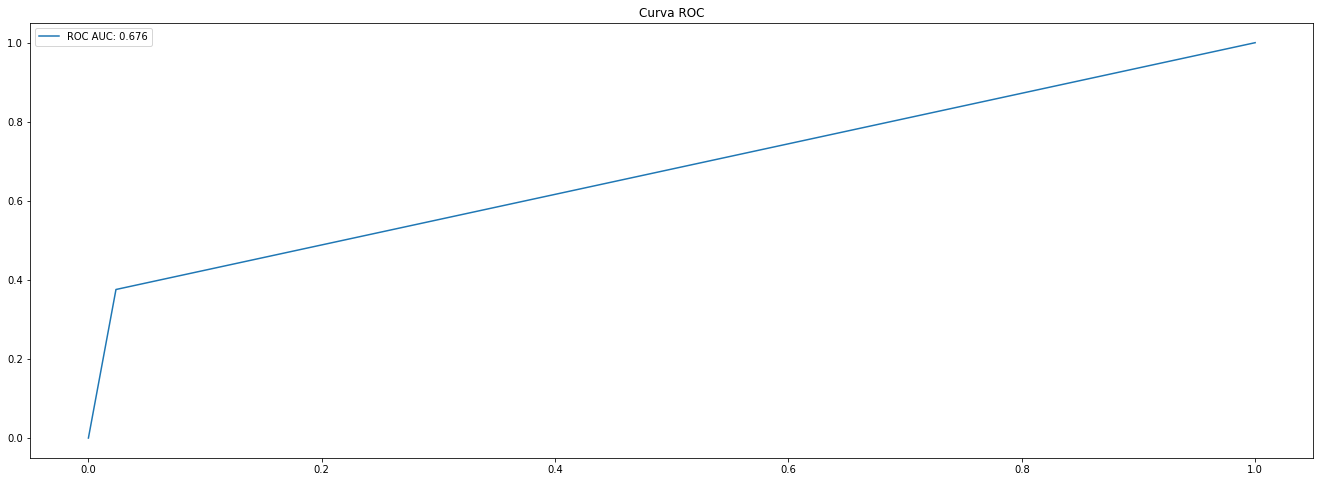

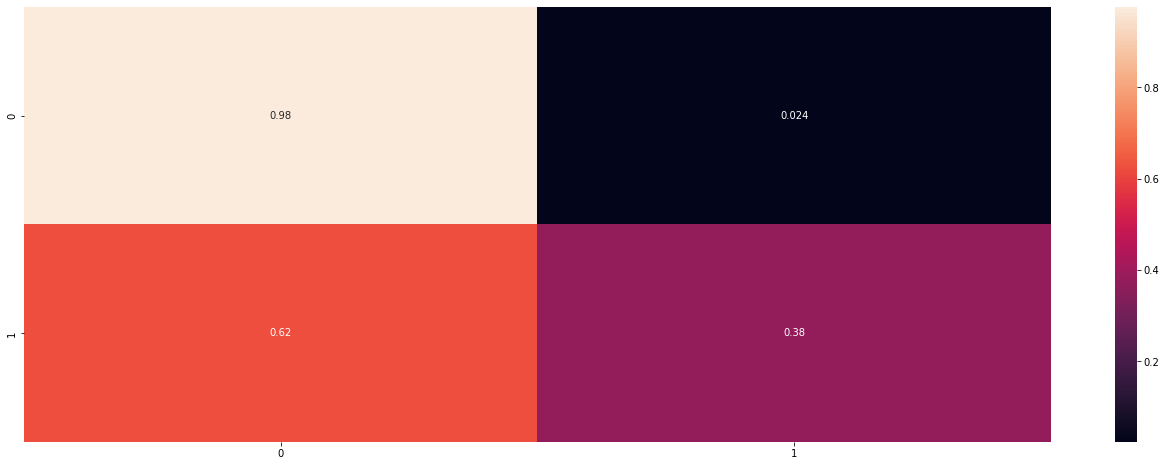

In [38]:
from sklearn.linear_model import LogisticRegression

grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l2"] #l2 ridge
}

grid={
    "C":[1.0], 
    "penalty":["l2"] #l2 ridge
}

logreg=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(estimator=logreg, param_grid=grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
logreg_cv.fit(x_train,y_train)
evaluacion_modelo(logreg_cv.best_estimator_, x_test, y_test)

**Random forest classifier**

Accuracy en testing: 0.902889050740471
F1 score en testing: 0.3449781659388646
AUC score en testing: 0.607851392361275


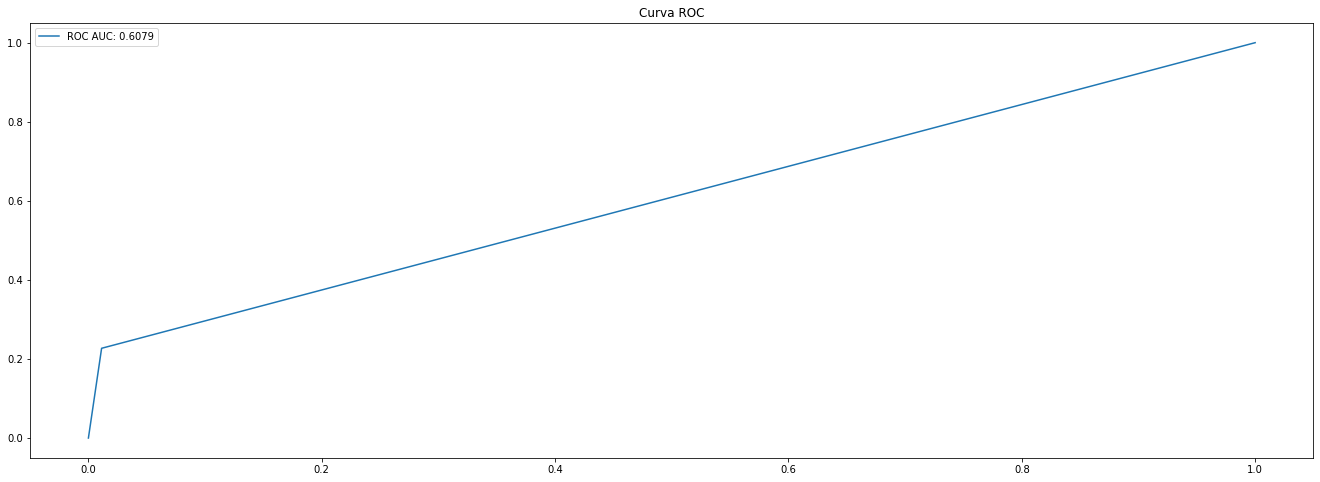

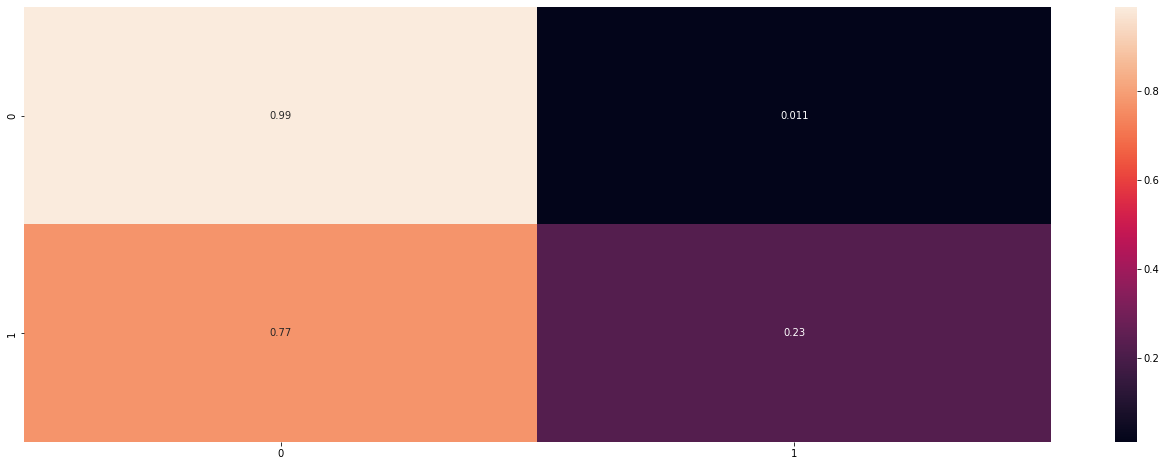

In [39]:
from sklearn.ensemble import RandomForestClassifier

params = {
 'bootstrap': [True, False],
 'max_depth': range(1,5),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'n_estimators': range(1,15)
}

params = {
 'bootstrap': [True],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [5]
}

tree = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Support vector machine**

Para este modelo en especial, es preferible utilizar el dataset bank.csv como fuente de informacion para entrenamiento.

La maquina de soporte vectorial (SVM) almacena una matriz que representa al dataset y calcula la distancia entre cada punto, es preferible que la matriz sea lo mas pequeña posible para que el tiempo de ejecucion sea minimo

In [40]:
df_bank_additional = pd.read_csv("bank-additional.csv",delimiter=";")

df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['job'], columns = ['job'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['marital'], columns = ['marital'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['education'], columns = ['education'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['default'], columns = ['default'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['housing'], columns = ['housing'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['loan'], columns = ['loan'], drop_first=True)
df_bank_additional = pd.get_dummies(df_bank_additional,prefix=['poutcome'], columns = ['poutcome'], drop_first=True)

month_mapping = {
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12
}
binary_mapping = {
    "yes":1,"no":0
}
contact_mapping = {
    "telephone":0,"cellular":0
}
dayweek_mapping = {
    'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,'sat':6,'sun':7
}

df_bank_additional["month"] = df_bank_additional["month"].map(month_mapping)
df_bank_additional["day_of_week"] = df_bank_additional["day_of_week"].map(dayweek_mapping)
df_bank_additional["contact"] = df_bank_additional["contact"].map(contact_mapping)
df_bank_additional["y"] = df_bank_additional["y"].map(binary_mapping)

x_train_svm = df_bank_additional[features].copy()
y_train_svm = df_bank_additional[target].copy()

df_bank_additional.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,30,0,5,5,487,2,999,0,-1.8,92.893,...,0,0,0,0,0,1,0,0,1,0
1,39,0,5,5,346,4,999,0,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
2,25,0,6,3,227,1,999,0,1.4,94.465,...,0,0,0,0,0,1,0,0,1,0
3,38,0,6,5,17,3,999,0,1.4,94.465,...,0,0,0,0,1,0,1,0,1,0
4,47,0,11,1,58,1,999,0,-0.1,93.200,...,1,0,0,0,0,1,0,0,1,0


In [41]:
from sklearn.svm import SVC

Accuracy en testing: 0.8873512988589464
F1 score en testing: 0.0
AUC score en testing: 0.5


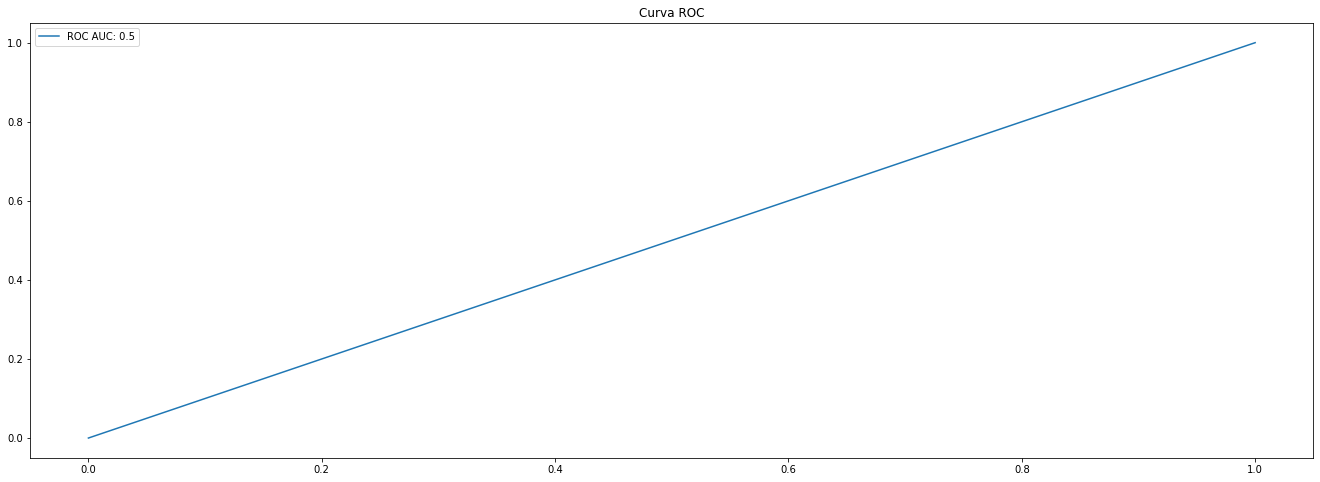

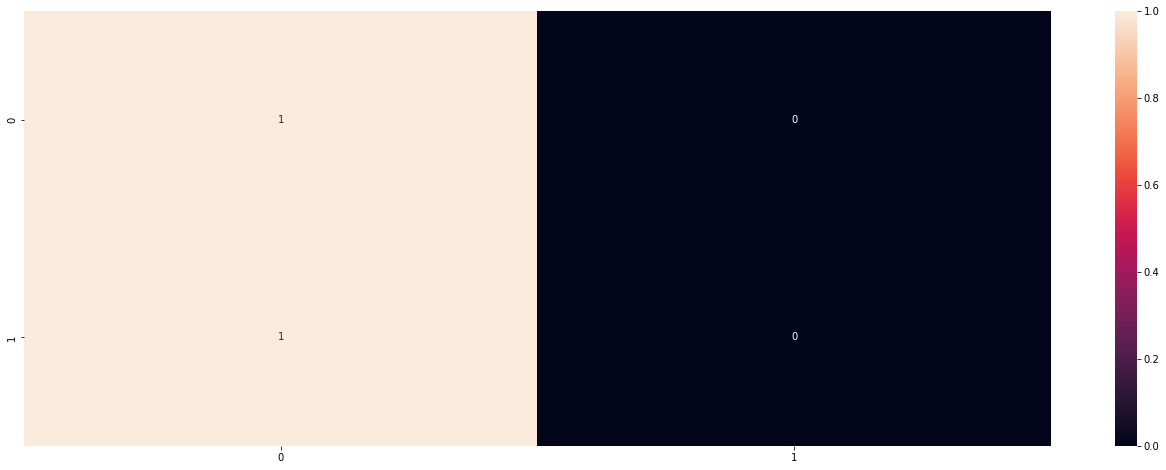

In [42]:
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1]
}

param_grid = {
    'C': [0.1],
    'gamma': [1]
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train_svm,y_train_svm)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**XGBoost classfier**

In [43]:
import xgboost
from xgboost import XGBClassifier

Accuracy en testing: 0.9149469936068625
F1 score en testing: 0.5807738332668528
AUC score en testing: 0.7438471940500337


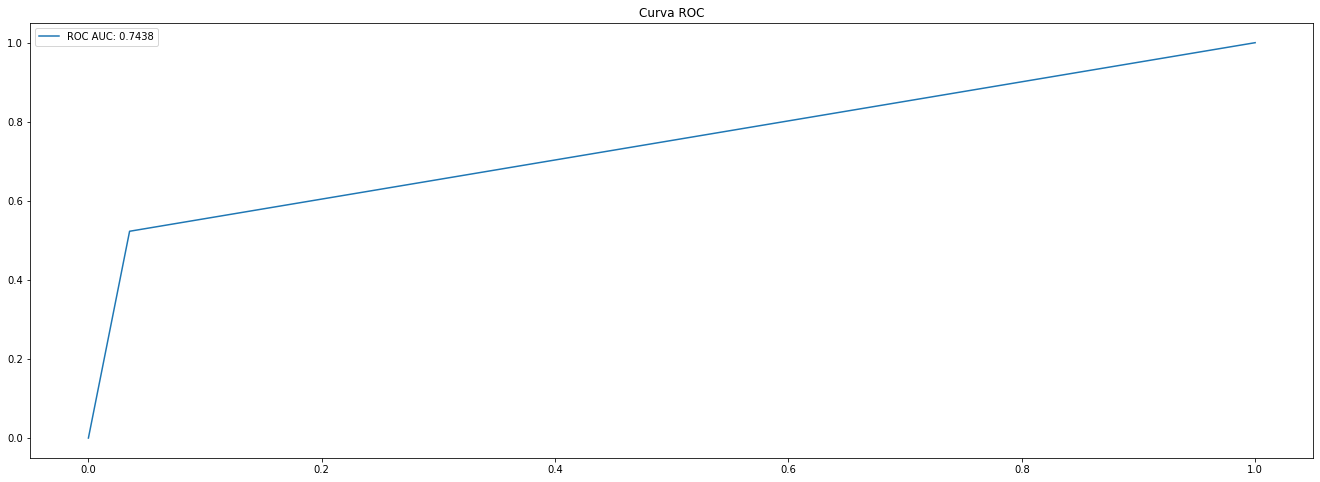

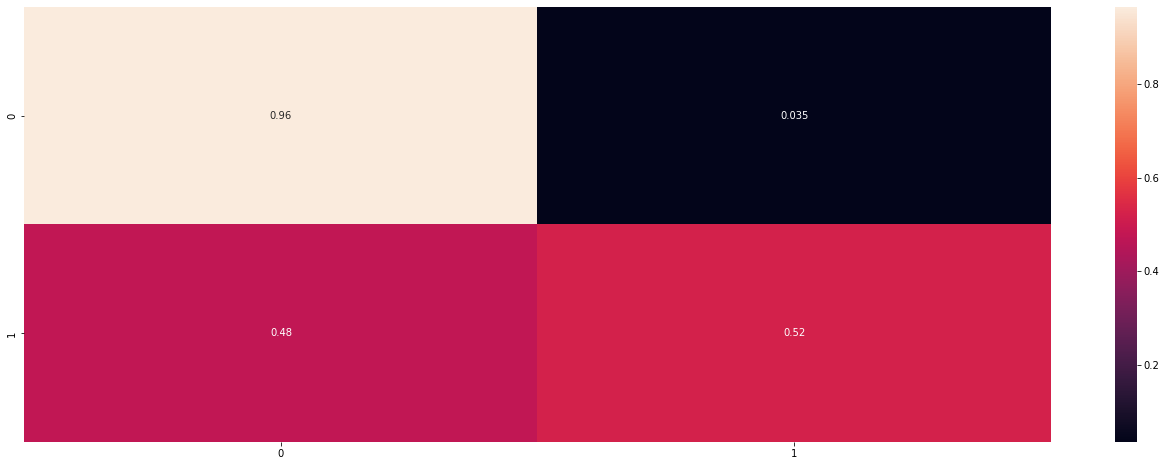

In [44]:
param_grid = {
 'gamma': [0.1, 1, 1.5],
 'learning_rate': [0.001, 0.01],
 'max_depth': [5, 10],
 'n_estimators': [1,5,10]
}

param_grid = {'gamma': [0.1], 'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [10]}

xgb_model = XGBClassifier(random_state=42, verbosity=0)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

**Seleccion del modelo para bank full**

El orden de resultados de F1-score es el siguiente:

* Decision tree classifier ->   0.59
* XGBoost classifier     ->     0.58
* Binary logistic regression -> 0.48
* Random forest classifier  ->  0.34
* Support vector machine   ->   0.0

Antes de determinar el modelo con mayor rendimiento, es posible descartar algunos modelos:

* SVM: el dataset es demasiado grande para este modelo en particular, ademas no fue capaz de definir vectores que discriminen los clusters de "y"
* Random forest: el voto mayoritario es contraproducente en este caso porque casi el 90% del dataset corresponde a casos fallidos ("y" = "no"), probablemente la mayoria de arboles dentro del random forest no seran capaces de discriminar los clusters

Entre los modelos Decision tree, Logistic regression y XGBoost, mi eleccion es XGBoost porque a pesar de no tener exactamente el score mas alto, es posible seguir entrenandolo con mas iteraciones


# **Modelo definitivo**

Despues de haber desarrollado y seleccionado el modelo para cada dataset es momento de definir cual de ambos es el mas apropiado como solucion para esta problematica.

Las metricas y sus resultados fueron estos:

* Bank full -> XGBoost con 0.488 de F1-score
* Bank additional full -> XGBoost con 0.58 de F1-score

Antes de tomar la decision sera necesario una interpretacion de los modelos para comparar las importancias de variables con las hipotesis expuestas en los analisis de datos

**XGBoost de bank full (modelo 1)**

Accuracy en testing: 0.8995871424358596
F1 score en testing: 0.48873873873873874
AUC score en testing: 0.6873198835891033


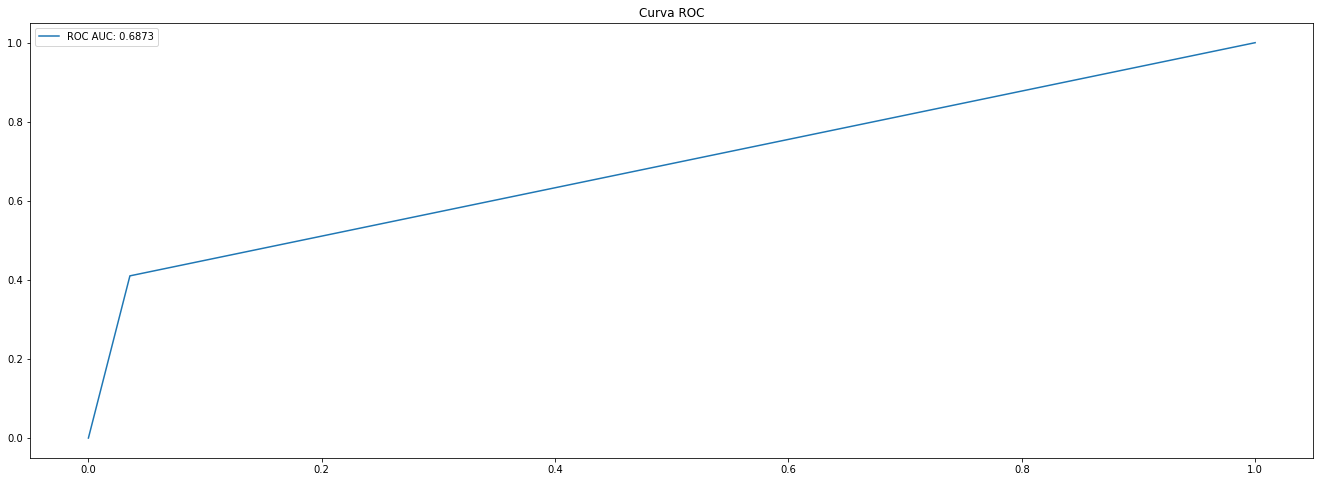

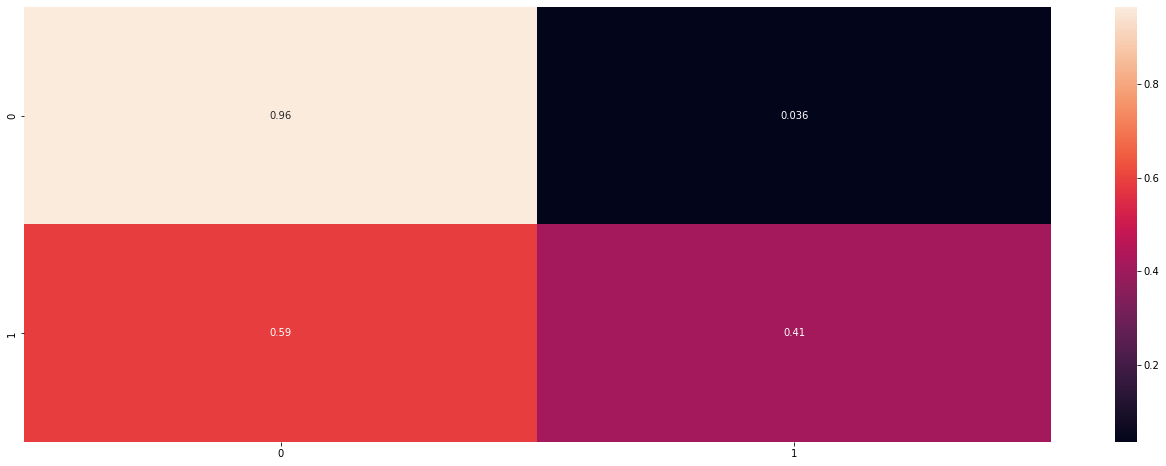

In [45]:
features = df_bank_full_v2.drop(columns=["y"]).columns
target = 'y'

X = df_bank_full_v2[features].copy()
y = df_bank_full_v2[target].copy()

test_pct = 0.3 #30% de los dados para testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, stratify = y, random_state=42)

del X,y

param_grid = {'gamma': [1.5], 'learning_rate': [0.01], 'max_depth': [10], 'n_estimators': [10]}

xgb_model = XGBClassifier(random_state=42, verbosity=0)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

El grafico de abajo visualiza los grados de importancias de las variables segun el xgboost, los 6 primeros son:

* duration
* day  
* month
* balance
* age
* pdays


La duracion de las llamadas son relevantes en las predicciones, tal como se ha mencionado en las hipotesis

Las variables "day" y "month" no deberian tener relevancia en la prediccion, probablemente hay un efecto de causalidad que no corresponde con los hechos reales.

La profundidad de este modelo es 10, la del otro modelo es 5, si una variable que no tiene correlacion con "y" (day,month) tiene alto grado de importancia es porque el modelo esta sobreajustado

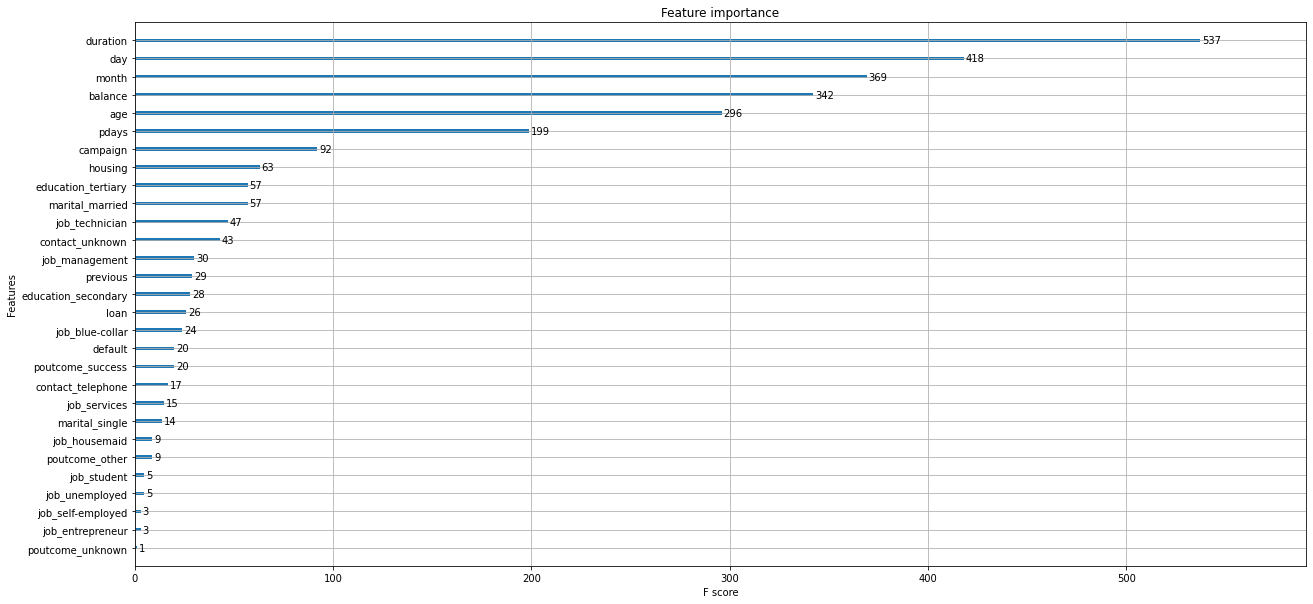

In [46]:
fig, ax = plt.subplots(1,1,figsize=(21,10))
xgboost.plot_importance(booster=grid_search.best_estimator_, ax=ax)

**XGBoost de bank additional full (modelo 2)**

Accuracy en testing: 0.9149469936068625
F1 score en testing: 0.5807738332668528
AUC score en testing: 0.7438471940500337


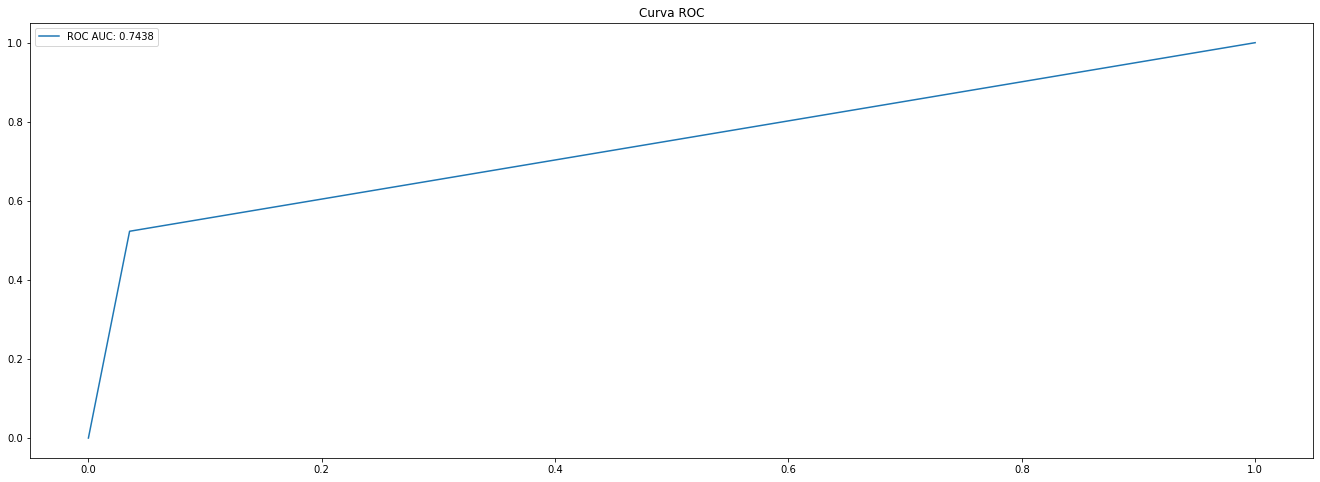

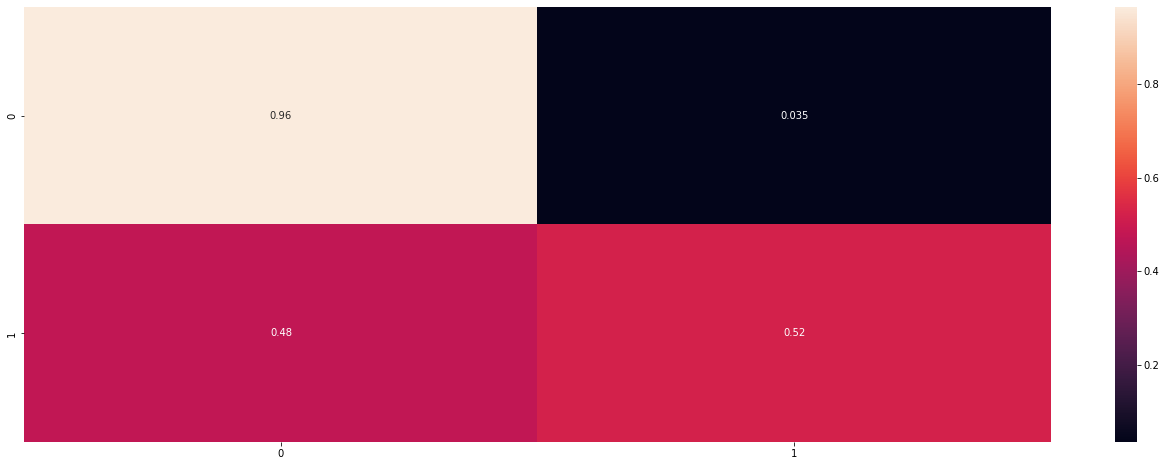

In [47]:
features = df_bank_additional_full_v2.drop(columns=["y"]).columns
target = 'y'

X = df_bank_additional_full_v2[features].copy()
y = df_bank_additional_full_v2[target].copy()

test_pct = 0.3 #30% de los dados para testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, stratify = y, random_state=42)

del X,y

param_grid = {'gamma': [0.1], 'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [10]}

xgb_model = XGBClassifier(random_state=42, verbosity=0)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, n_jobs=-1, verbose=0, scoring = "f1",error_score='raise')
grid_search.fit(x_train,y_train)
evaluacion_modelo(grid_search.best_estimator_, x_test, y_test)

El grafico de abajo visualiza los grados de importancias de las variables segun el xgboost, los 5 primeros son:

* duration
* euribor3m
* pdays
* cons.price.idx
* campaign

Es evidente que la duracion es la variable mas importante en las predicciones, sin embargo, hay otras determinantes como "campaign".

En el EDA de bank additional full surgio una hipotesis que limita a los posibles casos de exito que tengan mas de 20 contactos realizados. El grafico confirma su relevancia.

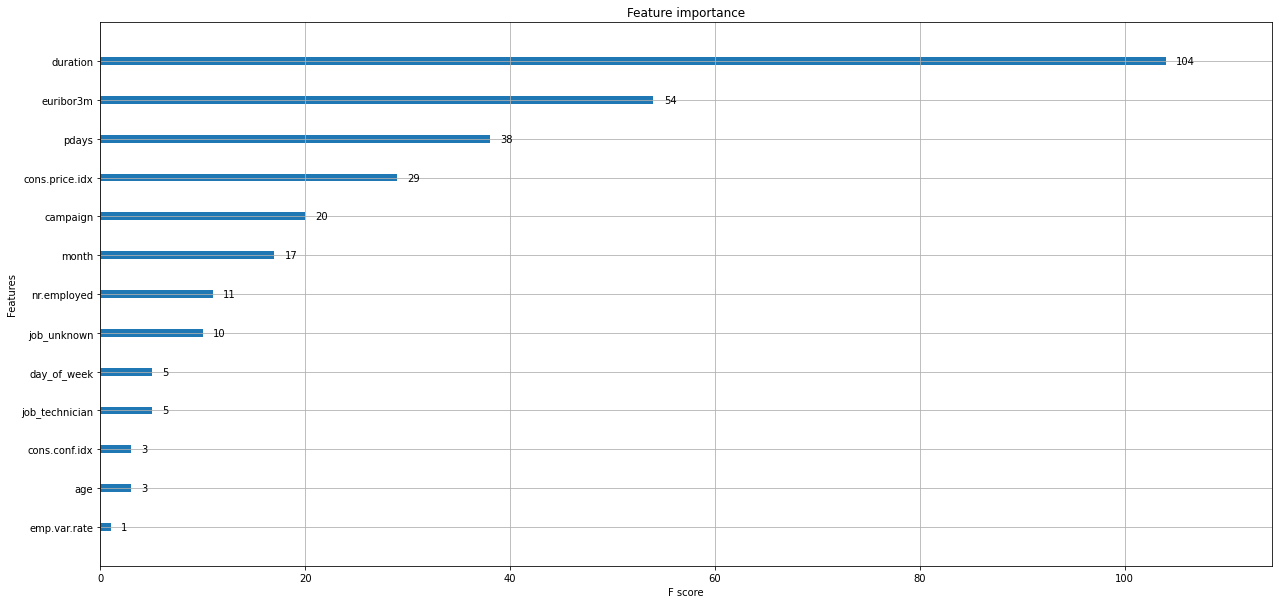

In [48]:
fig, ax = plt.subplots(1,1,figsize=(21,10))
xgboost.plot_importance(booster=grid_search.best_estimator_, ax=ax)

A diferencia del modelo 1, el modelo 2 no tiene ninguna inconsistencia entre  las descripciones de las variables y sus importancias.

El grado de profundidad del modelo 2 es 5, por lo que no tiene sobreajuste y ademas tiene mayor nivel de F1-score.

Por lo tanto, el modelo defintivo es el XGBoost del dataset bank additional con 42 parametros de entrada 

In [49]:
import pickle
name_object = 'ml_model.pkl'
fileObj = open(name_object, 'wb')
pickle.dump(grid_search.best_estimator_,fileObj)
fileObj.close()

# **Exportacion a base de datos**

El dataset bank additional full sera exportado a una base de datos sqlite

In [50]:
import sqlite3

conn = sqlite3.connect('bank-additional-full.db')
c = conn.cursor()

In [51]:
c.execute('''CREATE TABLE IF NOT EXISTS bankmarketing (age int,job text,marital text,education text,"default" text,
housing text,loan text,contact text,month text,day_of_week text,duration real,campaign int,pdays int,previous int,
poutcome text,"emp.var.rate" real,"cons.price.idx" real,"cons.conf.idx" real,euribor3m real,"nr.employed" real)''')

Seran registradas todas las columnas excepto "y"

In [52]:
cols = list(df_bank_additional_full.columns)
cols.remove("y")
df_bank_additional_full[cols].to_sql('bankmarketing', conn, if_exists='replace', index = False)

Listo!

In [53]:
fetchquery = pd.read_sql('''SELECT * FROM bankmarketing LIMIT 5''', conn)
fetchquery.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


**Promedio y extremos de la variable "duration"**

In [54]:
fetchqueryduration = pd.read_sql('''SELECT MIN(duration) as "min duration",MAX(duration) as "max duration",AVG(duration) as "average duration" FROM bankmarketing''', conn)
fetchqueryduration.head()

,min duration,max duration,average duration
0,0,4918,258.28501


**Prediccion en la base de datos**

Consulta de los datos

In [55]:
fetchquery = pd.read_sql('''SELECT * FROM bankmarketing''', conn)

Esto es muy importante, los datos deben ser procesados y transformados de la misma forma que en el desarrollo del modelo.

Las variables resultantes deben ser exactamente las mismas

In [56]:
def procesamiento_datos(fetchquery):
  fetchquery = pd.get_dummies(fetchquery,prefix=['job'], columns = ['job'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['marital'], columns = ['marital'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['education'], columns = ['education'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['default'], columns = ['default'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['housing'], columns = ['housing'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['loan'], columns = ['loan'], drop_first=True)
  fetchquery = pd.get_dummies(fetchquery,prefix=['poutcome'], columns = ['poutcome'], drop_first=True)

  month_mapping = {
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12
  }
  binary_mapping = {
    "yes":1,"no":0
  }
  contact_mapping = {
    "telephone":0,"cellular":0
  }
  dayweek_mapping = {
    'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,'sat':6,'sun':7
  }

  fetchquery["month"] = fetchquery["month"].map(month_mapping)
  fetchquery["day_of_week"] = fetchquery["day_of_week"].map(dayweek_mapping)
  fetchquery["contact"] = fetchquery["contact"].map(contact_mapping)

  features = ['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'emp.var.rate', 
  'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur','job_housemaid', 
  'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'job_unemployed',
  'job_unknown', 'marital_married', 'marital_single', 'marital_unknown','education_basic.6y', 'education_basic.9y', 
  'education_high.school','education_illiterate', 'education_professional.course','education_university.degree', 
  'education_unknown', 'default_unknown','default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
  'loan_yes', 'poutcome_nonexistent', 'poutcome_success']

  fetchquery = fetchquery[features].copy()

  return fetchquery

fetchquerypred = procesamiento_datos(fetchquery)
fetchquerypred.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,0,5,1,261,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
1,57,0,5,1,149,1,999,0,1.1,93.994,...,0,0,1,0,0,0,0,0,1,0
2,37,0,5,1,226,1,999,0,1.1,93.994,...,0,0,0,0,0,1,0,0,1,0
3,40,0,5,1,151,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
4,56,0,5,1,307,1,999,0,1.1,93.994,...,0,0,0,0,0,0,0,1,1,0


El modelo esta guardado en un archivo binario, para que pueda ser llamado en cualquier bloque de codigo

In [57]:
pickle_in = open("ml_model.pkl","rb")
ml_model = pickle.load(pickle_in)

El modelo realiza las predicciones

In [58]:
predictions = ml_model.predict(fetchquerypred)
fetchquery["prediction"] = predictions

Es necesario agregar una columna en la base de datos para registrar las prediciones

In [59]:
c.execute(''' ALTER TABLE bankmarketing ADD prediction int default 0''')

Por ultimo, se guardan las predicciones en la db

In [60]:
fetchquery.to_sql('bankmarketing', conn, if_exists='replace', index = False)